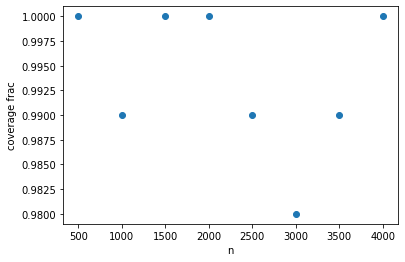

In [ ]:
# Chapter 4, problem 4, part b
import numpy as np
import matplotlib.pyplot as plt

def calc_eps(n, alpha):
    return np.sqrt(np.log(2/alpha)/(2*n))

def toss(n, probHead):
  cnt = 0
  for i in range(n):
    cnt += np.random.choice(a = [1, 0], p = [probHead, 1-probHead]) 
  return cnt/n

N = 5000
# vec_n = np.linspace(1, N+1, 51)
vec_n = np.array([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])
sim_runs = 100
vec_coverage = []
for n in vec_n:
    eps = calc_eps(n, 0.05)
    cnt = 0
    for i in range(sim_runs):
        phat = toss(int(n), .4)
        if (0.4 > phat - eps) and (0.4 < phat + eps):
            cnt += 1
    vec_coverage.append(cnt/sim_runs)

plt.plot(vec_n, vec_coverage, 'o')
plt.xlabel("n")
plt.ylabel("coverage frac")
plt.show()

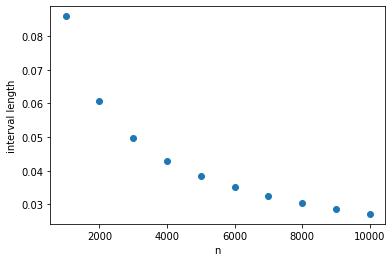

In [ ]:
# Chapter 4, problem 4, part c
vec_n = np.array([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
len_interval = []
for n in vec_n:
    len_interval.append(2*calc_eps(n, 0.05))

plt.plot(vec_n, len_interval, 'o')
plt.xlabel("n")
plt.ylabel("interval length")
plt.show()

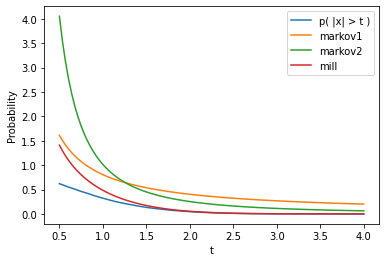

In [ ]:
# Chapter 4, problem 6
import numpy as np
import matplotlib.pyplot as plt
import math

N = 10000
vec_x = np.random.normal(0, 1, N)
vec_t = np.linspace(0.5, 4, 100)

y = abs(vec_x)
expected_x1 = np.mean(y)
expected_x2 = np.mean(pow(y, 2))
expected_x3 = np.mean(pow(y, 3))
markov1 = expected_x1/pow(vec_t, 1)
markov2 = expected_x2/pow(vec_t, 2)
markov3 = expected_x3/pow(vec_t, 3)
mill = np.sqrt(2/math.pi) * np.exp(-0.5*vec_t**2) / vec_t

# empirical p(|x| > t)
vec_prob = []
for t in vec_t:
    cnt = 0
    for x in vec_x:
        if abs(x)>t:
            cnt += 1
    vec_prob.append(cnt/len(vec_x))

plt.figure()
plt.plot(vec_t, vec_prob, label='p( |x| > t )')
plt.plot(vec_t, markov1, label='markov1')
plt.plot(vec_t, markov2, label='markov2')
plt.plot(vec_t, mill, label='mill')
plt.xlabel("t")
plt.legend()
plt.ylabel("Probability")
plt.show()


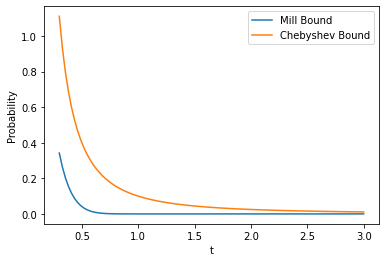

In [ ]:
# Chapter 4, problem 7
import numpy as np
import matplotlib.pyplot as plt
import math

def calc_mill(t, n):
    return np.sqrt(2/math.pi) * np.exp(-n * t**2) / (t * np.sqrt(n))

def calc_cheb(t, n):
    return 1 / (n * t**2)

vec_t = np.linspace(0.3, 3, 100)

n = 10
mill = calc_mill(vec_t, n)
cheb = calc_cheb(vec_t, n)

plt.figure()
plt.plot(vec_t, mill, label='Mill Bound')
plt.plot(vec_t, cheb, label='Chebyshev Bound')
plt.xlabel("t")
plt.legend()
plt.ylabel("Probability")
plt.show()
